# Домашнее задание

Необходимо построить минимум 5 визуализации различных видов по выбранным данным, используя хотя бы две из рассмотренных на занятии библиотек.

Для каждой визуализации описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и какие гипотезы на ее основе можно выдвинуть.

In [307]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import calendar

import warnings
warnings.filterwarnings('ignore')

В качестве анализируемого датасета выберем данные о продажах жилых домов в США.

In [308]:
data = pd.read_csv('house_prices_train.csv')
data.shape

(1460, 81)

Определим количество столбцов, содержащих пропуски данных 

In [309]:
len(data.columns[data.isnull().sum() != 0])

19

Признаков достаточно много, поэтому для решения поставленной задачи можно удалить те из них, которые содержат Nan.

In [310]:
data.dropna(axis=1, inplace=True)
data.shape

(1460, 62)

Также уберем категориальные значения

In [311]:
data.drop(data.select_dtypes(exclude=np.number), axis=1, inplace=True)
data.shape

(1460, 35)

In [312]:
data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


Определим динамику цен на дома по годам

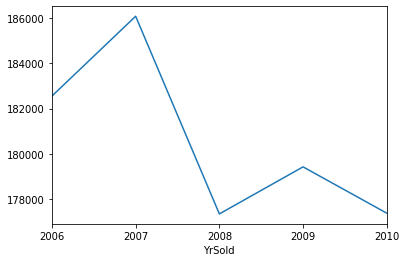

In [313]:
data_1 = data[['YrSold', 'SalePrice']]
data_1["YrSold"] = pd.to_datetime(data_1["YrSold"].astype(str), format="%Y")
data_1.groupby('YrSold')['SalePrice'].mean().plot()

Выведем также график объемов продаж

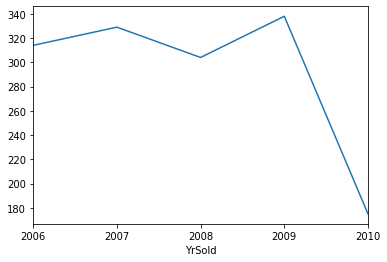

In [314]:
data_1.groupby('YrSold')['SalePrice'].count().plot()

На первом графике видно влияние мирового экономического кризиса 2008 года: падение цен на недвижимость (при том, что общий объем продаж изменился незначительно).

Выявим разброс площадей проданных домов

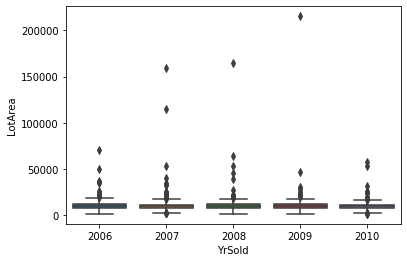

In [315]:
sns.boxplot(x="YrSold", y="LotArea", 
            data=data)

Полученный график малоинформативен, поэтому уберем из рассмотрения большие выбросы.

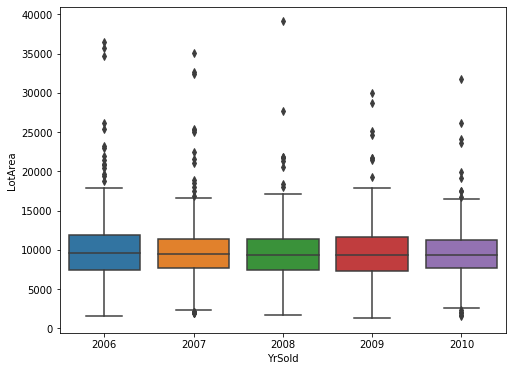

In [316]:
new_data = data.drop(np.where(data.LotArea > 40000)[0])
plt.figure(figsize=(8, 6))
sns.boxplot(x="YrSold", y="LotArea", 
            data=new_data)

В целом разброс площадей приобретаемого жилья изменяется незначительно. 

Можно выделить, что в 2006 году покупали больше домов разных площадей,  в том числе потому что есть много выбросов в сторону больших значений. 

В 2010, напротив, разброс уменьшился, стали меньше покупать домов как с очень маленькой, так и с большой площадью. При том что выбросы в большую сторону всё же присутствуют, их значения меньше, чем в 2006 или 2008 годах.

Рассмотрим некоторые признаки, которые больше всего влияют на цену жилья

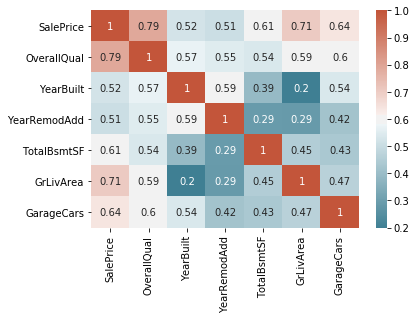

In [317]:
cor_matrix = data[['SalePrice', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'GarageCars']].corr()
sns.heatmap(cor_matrix, xticklabels=cor_matrix.columns, yticklabels=cor_matrix.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Таким образом, можно утверждать, что при покупке жилья основными критериями являются:
* общее качество материалов и отделки (OverallQual);
* надземная жилая площадь (GrLivArea);
* количество машин, вмещаемых в гараж (GarageCars).

Сравним, дома какой этажности выбирают чаще. Построим для этого столбчатую диаграмму

In [225]:
# Создадим дополнительный столбец, указывающий количество этажей в доме
data_2 = data[['YrSold']]
data_2['NumOfFloor'] = np.where(data['2ndFlrSF'] == 0, 1, 2)
data_2['Counter'] = 1

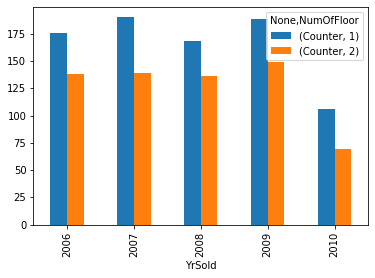

In [229]:
floor_dynamics = data_2.groupby(['YrSold', 'NumOfFloor']).sum()
floor_dynamics
floor_dynamics.unstack().plot(kind='bar')

За время наблюдения большей популярностью пользуются одноэтажные дома. 

Рассмотрим распределение продаж в течение года.

<BarContainer object of 12 artists>

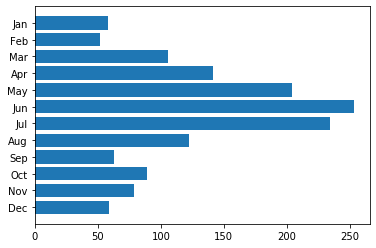

In [318]:
plt.barh(np.sort(data['MoSold'].unique()), data['MoSold'].value_counts().sort_index(ascending=False),
         tick_label=data['MoSold'].sort_values(ascending=False).apply(lambda x: calendar.month_abbr[x]).unique())

Из графика следует, что в течение года можно выделить период увеличения продаж (с мая по июнь) и период падения спроса (сенятбрь).